### EDA and Plots

In [74]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt


Read from the combined demand and temperature dataset.

In [75]:
#read csv files into pandas dataframes
df = pd.read_csv('../data/totaldemand_temperature_nsw.csv')
df.head()

,DATETIME,TOTALDEMAND,TEMPERATURE,SEASON,WEEKDAY
0,2010-01-01 00:00:00,8038.00,23.1,Summer,Friday
1,2010-01-01 00:30:00,7809.31,22.9,Summer,Friday
2,2010-01-01 01:00:00,7483.69,22.6,Summer,Friday
3,2010-01-01 01:30:00,7117.23,22.5,Summer,Friday
4,2010-01-01 02:00:00,6812.03,22.5,Summer,Friday


In [77]:
#check the data types of the columns
df.dtypes

DATETIME        object
TOTALDEMAND    float64
TEMPERATURE    float64
SEASON          object
WEEKDAY         object
dtype: object

In [78]:
#describe TOTALDEMAND column
df['TOTALDEMAND'].describe()

count    195934.000000
mean       8111.950451
std        1299.194219
min        5074.630000
25%        7149.472500
50%        8052.245000
75%        8956.987500
max       14579.860000
Name: TOTALDEMAND, dtype: float64

In [50]:
#describe TEMPERATURE column
df['TEMPERATURE'].describe()

count    195934.000000
mean         17.530868
std           5.884349
min          -1.300000
25%          13.500000
50%          17.900000
75%          21.500000
max          44.700000
Name: TEMPERATURE, dtype: float64

In [80]:
#check for missing values
df.isnull().sum()

DATETIME       0
TOTALDEMAND    0
TEMPERATURE    0
SEASON         0
WEEKDAY        0
dtype: int64

### Demand data analysis

In [84]:
#20 highest demand days
df.nlargest(20, 'TOTALDEMAND')


,DATETIME,TOTALDEMAND,TEMPERATURE,SEASON,WEEKDAY
18780,2011-02-01 16:30:00,14579.86,40.6,Summer,Tuesday
18779,2011-02-01 16:00:00,14525.73,40.5,Summer,Tuesday
18875,2011-02-03 16:00:00,14449.88,36.4,Summer,Thursday
18781,2011-02-01 17:00:00,14440.04,40.1,Summer,Tuesday
18827,2011-02-02 16:00:00,14417.03,30.5,Summer,Wednesday
18874,2011-02-03 15:30:00,14408.45,36.1,Summer,Thursday
18826,2011-02-02 15:30:00,14403.24,30.5,Summer,Wednesday
18778,2011-02-01 15:30:00,14337.52,40.3,Summer,Tuesday
18876,2011-02-03 16:30:00,14333.12,30.5,Summer,Thursday
18877,2011-02-03 17:00:00,14315.54,29.8,Summer,Thursday


In [85]:
#20 lowest demand days
df.nsmallest(20, 'TOTALDEMAND')

,DATETIME,TOTALDEMAND,TEMPERATURE,SEASON,WEEKDAY
52010,2012-12-26 04:00:00,5074.63,18.3,Summer,Wednesday
52009,2012-12-26 03:30:00,5088.73,18.4,Summer,Wednesday
69524,2013-12-26 03:30:00,5113.03,18.9,Summer,Thursday
69525,2013-12-26 04:00:00,5124.08,18.9,Summer,Thursday
87042,2014-12-26 04:00:00,5138.11,19.3,Summer,Friday
52008,2012-12-26 03:00:00,5141.31,18.5,Summer,Wednesday
87041,2014-12-26 03:30:00,5143.15,19.3,Summer,Friday
52011,2012-12-26 04:30:00,5147.59,18.3,Summer,Wednesday
69523,2013-12-26 03:00:00,5152.93,18.9,Summer,Thursday
69526,2013-12-26 04:30:00,5169.80,18.8,Summer,Thursday


### Temperature data analysis

In [51]:
#maximum temperature in Summer season
df[df['SEASON'] == 'Summer']['TEMPERATURE'].max()


44.7

In [52]:
#average temperature in Summer season
df[df['SEASON'] == 'Summer']['TEMPERATURE'].mean()



22.395895056219878

In [53]:
#show maximum and minimum and average temperature in each season in a table
df.groupby('SEASON')['TEMPERATURE'].agg(['max', 'min', 'mean'])


,max,min,mean
SEASON,,,
Autumn,38.8,1.9,17.803073
Spring,40.4,2.9,17.709757
Summer,44.7,8.9,22.395895
Winter,28.7,-1.3,11.997980


In [54]:
#show maximum and minimum and average demand in each season in a table
df.groupby('SEASON')['TOTALDEMAND'].agg(['max', 'min', 'mean'])


,max,min,mean
SEASON,,,
Autumn,12191.08,5384.58,7904.382291
Spring,12601.82,5221.13,7648.256947
Summer,14579.86,5074.63,8155.246733
Winter,13176.33,5623.02,8738.915025


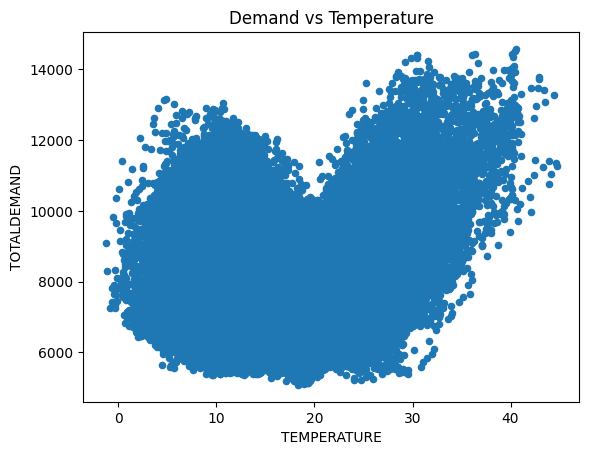

In [88]:
#scatter plot of demand vs temperature
df.plot.scatter(x='TEMPERATURE', y='TOTALDEMAND')
plt.title('Demand vs Temperature')
plt.show()

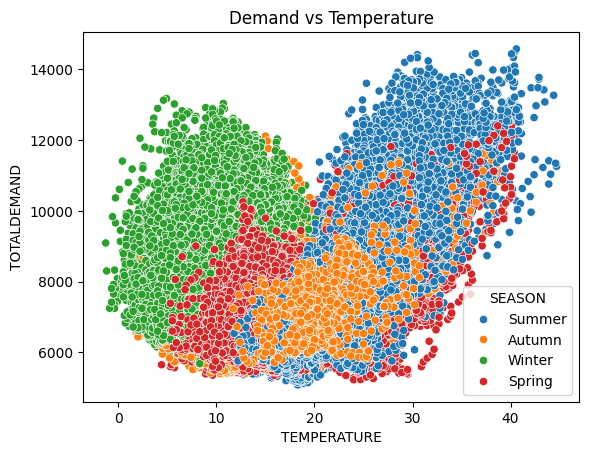

In [87]:
#scatter plot demand vs temperature
import seaborn as sns
sns.scatterplot(data=df, x='TEMPERATURE', y='TOTALDEMAND', hue='SEASON')
plt.title('Demand vs Temperature')
plt.show()




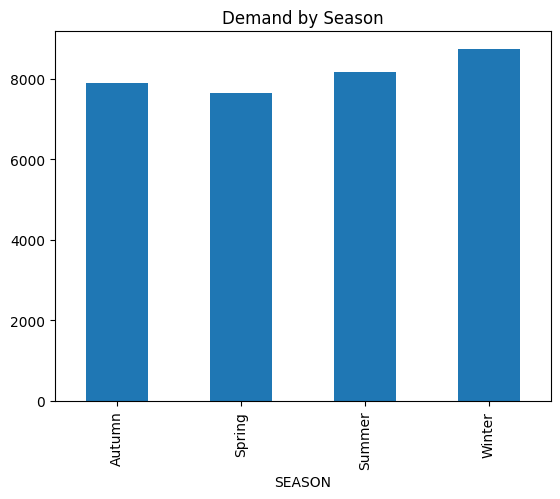

In [89]:
#demand by season
df.groupby('SEASON')['TOTALDEMAND'].mean().plot(kind='bar')
plt.title('Demand by Season')
plt.show()



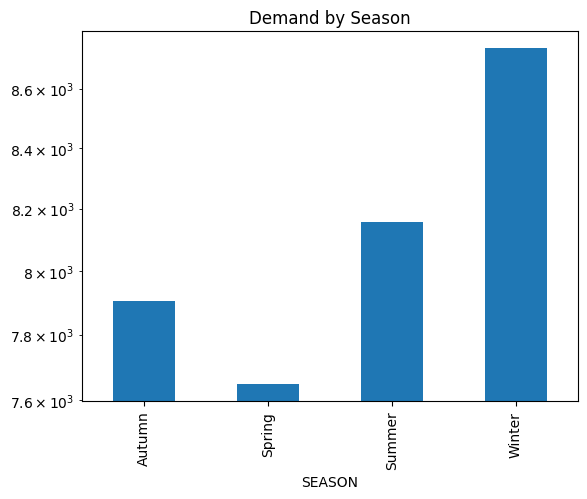

In [102]:
#scaled bar chart of demand by season
df.groupby('SEASON')['TOTALDEMAND'].mean().plot(kind='bar', logy=True)
plt.title('Demand by Season')
plt.show()


According to our data we see Winter sason the electricity demand is higher. 

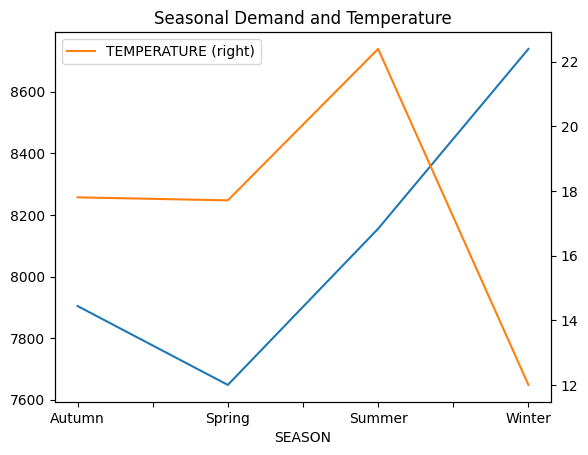

In [120]:
#plot seasonal demand and temperature 
df.groupby('SEASON')['TOTALDEMAND'].mean().plot()
df.groupby('SEASON')['TEMPERATURE'].mean().plot(secondary_y=True)
plt.legend(loc='upper left')
plt.title('Seasonal Demand and Temperature')
plt.show()



Text(0.5, 1.0, 'Demand by Weekday')

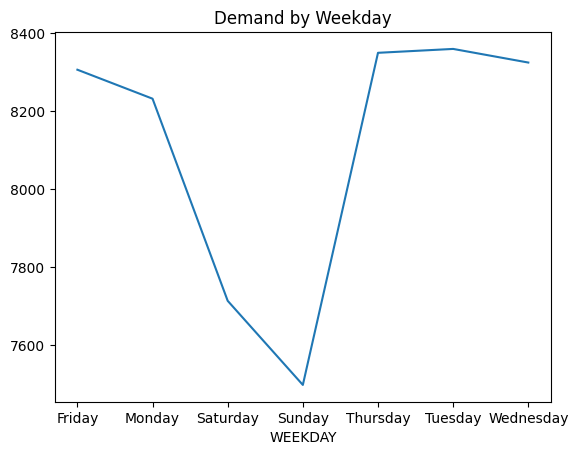

In [108]:
#plot demand in weekdays 
df.groupby('WEEKDAY')['TOTALDEMAND'].mean().plot()
plt.title('Demand by Weekday')


In [109]:
df.dtypes

DATETIME        object
TOTALDEMAND    float64
TEMPERATURE    float64
SEASON          object
WEEKDAY         object
dtype: object

In [111]:
#chnage the dateformat of DATETIME 
df['DATETIME'] = pd.to_datetime(df['DATETIME']) 
df.head()

,DATETIME,TOTALDEMAND,TEMPERATURE,SEASON,WEEKDAY
0,2010-01-01 00:00:00,8038.00,23.1,Summer,Friday
1,2010-01-01 00:30:00,7809.31,22.9,Summer,Friday
2,2010-01-01 01:00:00,7483.69,22.6,Summer,Friday
3,2010-01-01 01:30:00,7117.23,22.5,Summer,Friday
4,2010-01-01 02:00:00,6812.03,22.5,Summer,Friday


Setting DATETIME as index. 

In [112]:
df.set_index('DATETIME', inplace=True)
df.head()

,TOTALDEMAND,TEMPERATURE,SEASON,WEEKDAY
DATETIME,,,,
2010-01-01 00:00:00,8038.00,23.1,Summer,Friday
2010-01-01 00:30:00,7809.31,22.9,Summer,Friday
2010-01-01 01:00:00,7483.69,22.6,Summer,Friday
2010-01-01 01:30:00,7117.23,22.5,Summer,Friday
2010-01-01 02:00:00,6812.03,22.5,Summer,Friday


/var/folders/vr/sx0pb6yj5415ch82cprw5jxc0000gn/T/ipykernel_97202/1942187067.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df[df['WEEKDAY'] == 'Friday']['TOTALDEMAND'].resample('H').mean().plot()


<Axes: xlabel='DATETIME'>

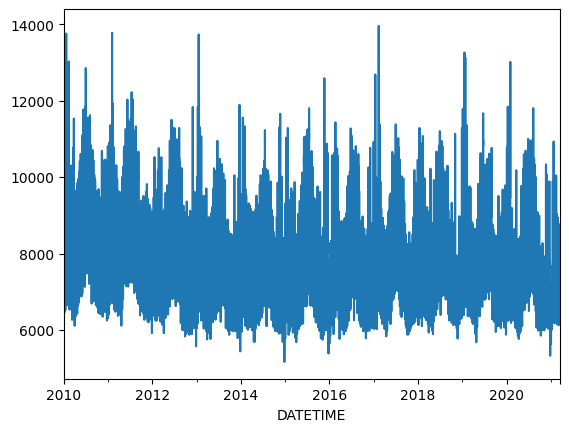

In [113]:
#plot hourly demand for Friday 
df[df['WEEKDAY'] == 'Friday']['TOTALDEMAND'].resample('H').mean().plot()


Now we want to explore the nature of demand for different weekday.

/var/folders/vr/sx0pb6yj5415ch82cprw5jxc0000gn/T/ipykernel_97202/1009826040.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df[df['WEEKDAY'] == 'Friday']['TOTALDEMAND'].resample('H').mean().plot()


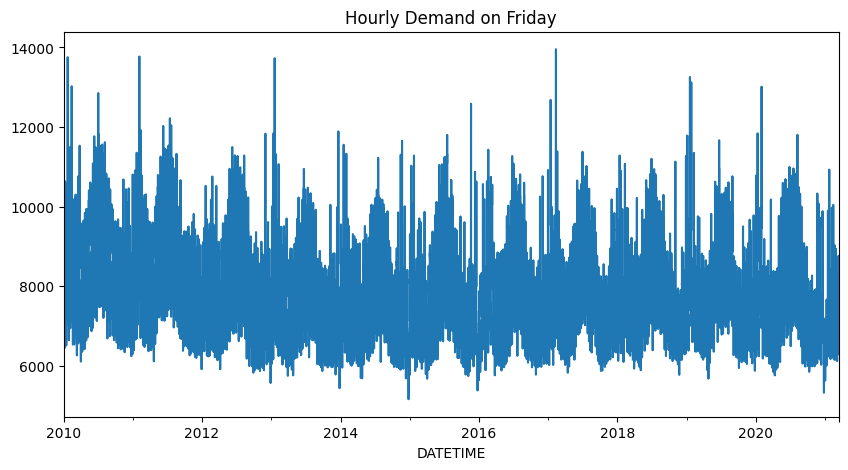

In [122]:
#resize the plot
plt.figure(figsize=(10,5))
df[df['WEEKDAY'] == 'Friday']['TOTALDEMAND'].resample('H').mean().plot()
plt.title('Hourly Demand on Friday')
plt.show()


/var/folders/vr/sx0pb6yj5415ch82cprw5jxc0000gn/T/ipykernel_97202/2633256051.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df[df['WEEKDAY'] == day]['TOTALDEMAND'].resample('H').mean().plot()
/var/folders/vr/sx0pb6yj5415ch82cprw5jxc0000gn/T/ipykernel_97202/2633256051.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df[df['WEEKDAY'] == day]['TOTALDEMAND'].resample('H').mean().plot()
/var/folders/vr/sx0pb6yj5415ch82cprw5jxc0000gn/T/ipykernel_97202/2633256051.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df[df['WEEKDAY'] == day]['TOTALDEMAND'].resample('H').mean().plot()
/var/folders/vr/sx0pb6yj5415ch82cprw5jxc0000gn/T/ipykernel_97202/2633256051.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df[df['WEEKDAY'] == day]['TOTALDEMAND'].resample('H').mean().plot()


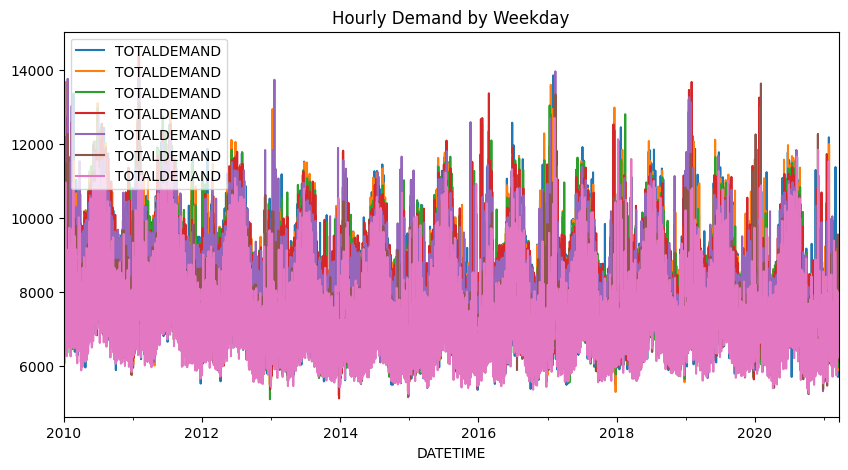

In [159]:
#plot hourly demand for each WEEKDAY
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10,5))
for day in weekdays:
    df[df['WEEKDAY'] == day]['TOTALDEMAND'].resample('H').mean().plot()
plt.legend(weekdays)
plt.title('Hourly Demand by Weekday')
plt.legend(loc='upper left')
plt.show()


/var/folders/vr/sx0pb6yj5415ch82cprw5jxc0000gn/T/ipykernel_97202/233714607.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df[(df['WEEKDAY'] == 'Friday') & (df['SEASON'] == 'Summer') & (df.index.year == 2018)]['TOTALDEMAND'].resample('H').mean().plot()
/var/folders/vr/sx0pb6yj5415ch82cprw5jxc0000gn/T/ipykernel_97202/233714607.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df[(df['WEEKDAY'] == 'Friday') & (df['SEASON'] == 'Winter') & (df.index.year == 2018)]['TOTALDEMAND'].resample('H').mean().plot()
/var/folders/vr/sx0pb6yj5415ch82cprw5jxc0000gn/T/ipykernel_97202/233714607.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df[(df['WEEKDAY'] == 'Friday') & (df['SEASON'] == 'Autumn') & (df.index.year == 2018)]['TOTALDEMAND'].resample('H').mean().plot()
/var/folders/vr/sx0pb6yj5415ch82cprw5jxc0000gn/T/ipykernel_97202/23

Text(0.5, 1.0, 'Hourly Demand on Fridays in 2018')

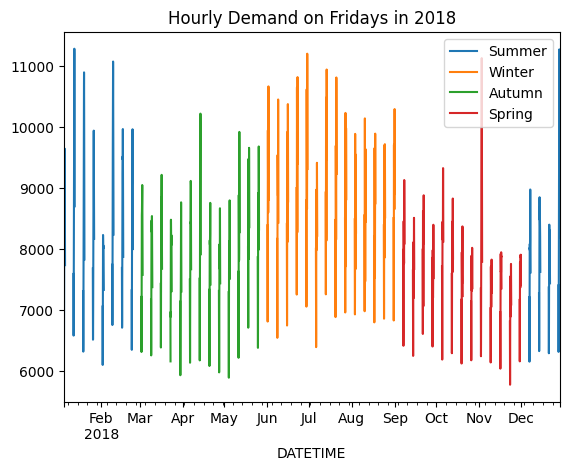

In [134]:
#plot hourly demand for Fridays  2018
df[(df['WEEKDAY'] == 'Friday') & (df['SEASON'] == 'Summer') & (df.index.year == 2018)]['TOTALDEMAND'].resample('H').mean().plot()
df[(df['WEEKDAY'] == 'Friday') & (df['SEASON'] == 'Winter') & (df.index.year == 2018)]['TOTALDEMAND'].resample('H').mean().plot()
df[(df['WEEKDAY'] == 'Friday') & (df['SEASON'] == 'Autumn') & (df.index.year == 2018)]['TOTALDEMAND'].resample('H').mean().plot()
df[(df['WEEKDAY'] == 'Friday') & (df['SEASON'] == 'Spring') & (df.index.year == 2018)]['TOTALDEMAND'].resample('H').mean().plot()
plt.legend(['Summer', 'Winter', 'Autumn', 'Spring'])
plt.title('Hourly Demand on Fridays in 2018')


/var/folders/vr/sx0pb6yj5415ch82cprw5jxc0000gn/T/ipykernel_97202/2987555064.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['2018-12':'2019-01']['TOTALDEMAND'].resample('H').mean().plot()


<Axes: xlabel='DATETIME'>

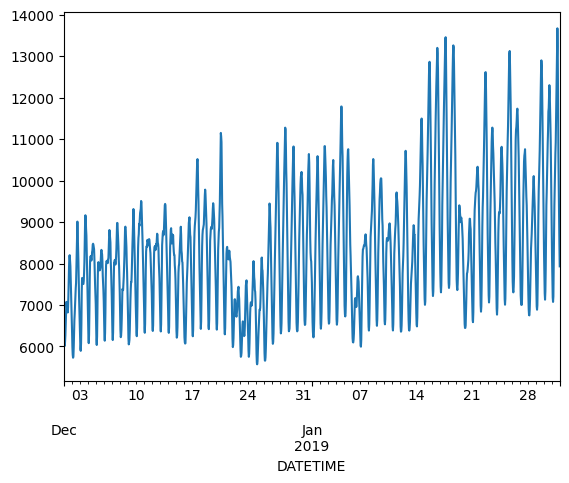

In [136]:
#line plot of demand in DEC 2018 to JAN 2019
df['2018-12':'2019-01']['TOTALDEMAND'].resample('H').mean().plot()



/var/folders/vr/sx0pb6yj5415ch82cprw5jxc0000gn/T/ipykernel_97202/1930088381.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['2018-12':'2019-02']['TOTALDEMAND'].resample('H').mean().plot()
/var/folders/vr/sx0pb6yj5415ch82cprw5jxc0000gn/T/ipykernel_97202/1930088381.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['2018-12':'2019-02']['TEMPERATURE'].resample('H').mean().plot(secondary_y=True)


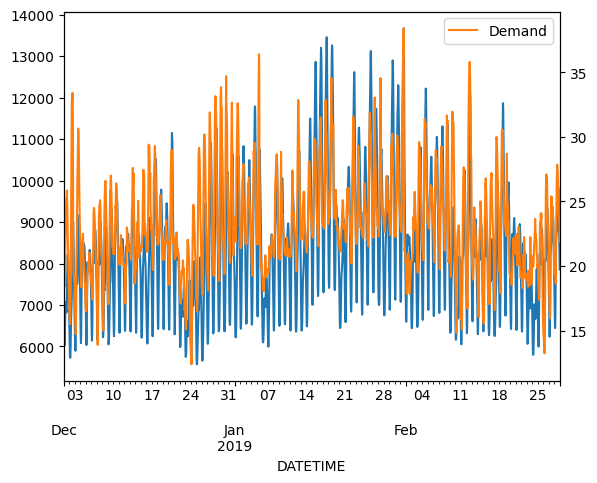

In [137]:
#hourly demand and temperature in DEC 2018 to FEB 2019
df['2018-12':'2019-02']['TOTALDEMAND'].resample('H').mean().plot()
df['2018-12':'2019-02']['TEMPERATURE'].resample('H').mean().plot(secondary_y=True)
plt.legend(['Demand', 'Temperature'])
plt.show()



<Axes: xlabel='DATETIME'>

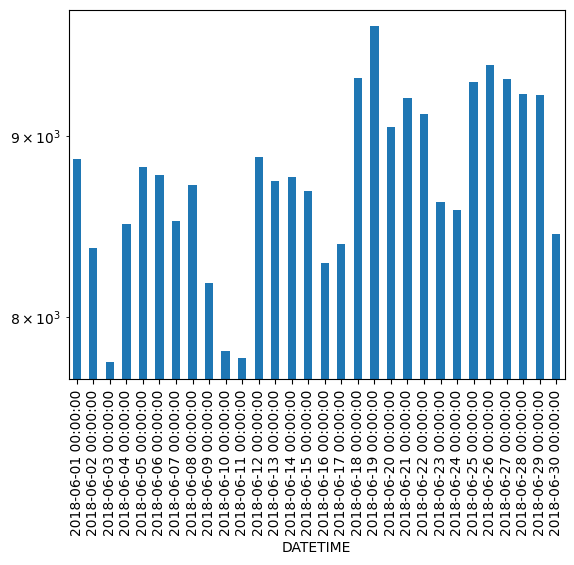

In [139]:
# barplot of demand for DEC 2018 to JAN 2019 
df['2018-06-01':'2018-06-30']['TOTALDEMAND'].resample('D').mean().plot(kind='bar', logy=True)


<Axes: xlabel='WEEKDAY'>

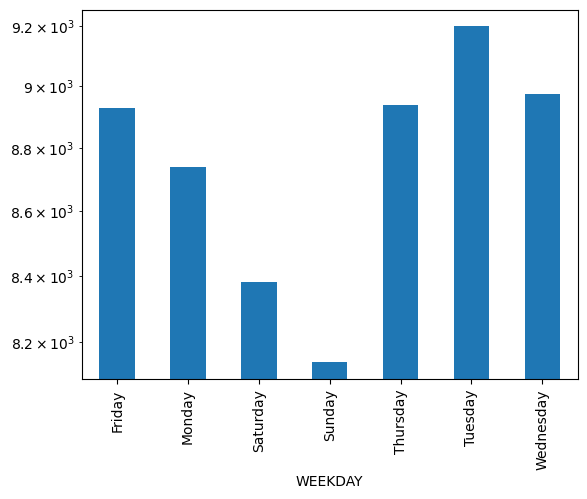

In [140]:
#average demand for weekdays for month June 2018
df['2018-06-01':'2018-06-30'].groupby('WEEKDAY')['TOTALDEMAND'].mean().plot(kind='bar', logy=True)




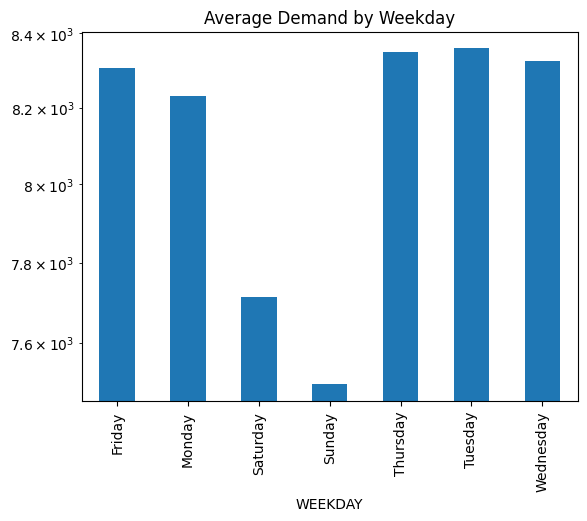

In [141]:
#average demand for weekdays 
df.groupby('WEEKDAY')['TOTALDEMAND'].mean().plot(kind='bar', logy=True)
plt.title('Average Demand by Weekday')
plt.show()


We can clearly see that weekends has less demand than weekdays. 

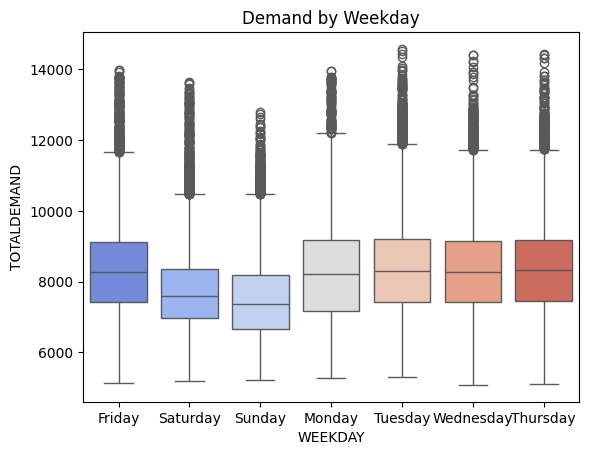

In [147]:
#boxplot of demand by weekday 
sns.boxplot(data=df, x='WEEKDAY', y='TOTALDEMAND', palette='coolwarm', hue='WEEKDAY')
plt.title('Demand by Weekday')
plt.show()




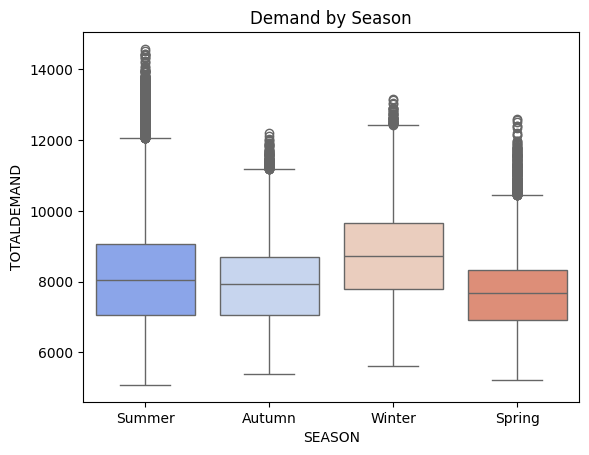

In [151]:
#seasonal boxplot of demand
sns.boxplot(data=df, x='SEASON', y='TOTALDEMAND', palette='coolwarm', hue='SEASON')
plt.title('Demand by Season')
plt.show()


/var/folders/vr/sx0pb6yj5415ch82cprw5jxc0000gn/T/ipykernel_97202/3131638104.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=df.index.year, y='TOTALDEMAND', palette='coolwarm')


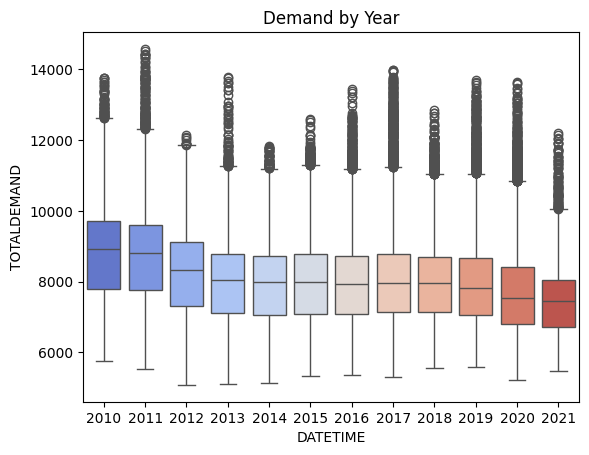

In [218]:
#box plot of demand by year
sns.boxplot(data=df, x=df.index.year, y='TOTALDEMAND', palette='coolwarm')
plt.title('Demand by Year')
plt.show()


/var/folders/vr/sx0pb6yj5415ch82cprw5jxc0000gn/T/ipykernel_97202/2830228124.py:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df.resample('Y')['TOTALDEMAND'].mean().plot()


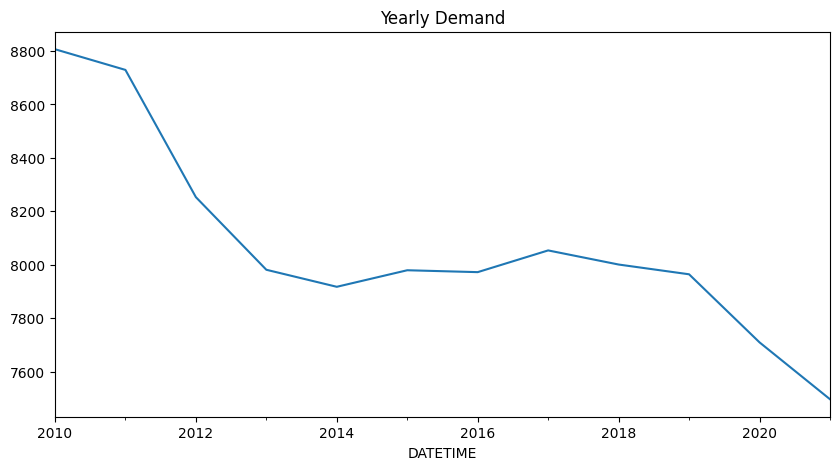

In [160]:
#yearly demand for each year
plt.figure(figsize=(10,5))
df.resample('Y')['TOTALDEMAND'].mean().plot()
plt.title('Yearly Demand')
plt.show()


/var/folders/vr/sx0pb6yj5415ch82cprw5jxc0000gn/T/ipykernel_97202/718044314.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample('M')['TOTALDEMAND'].mean().plot()


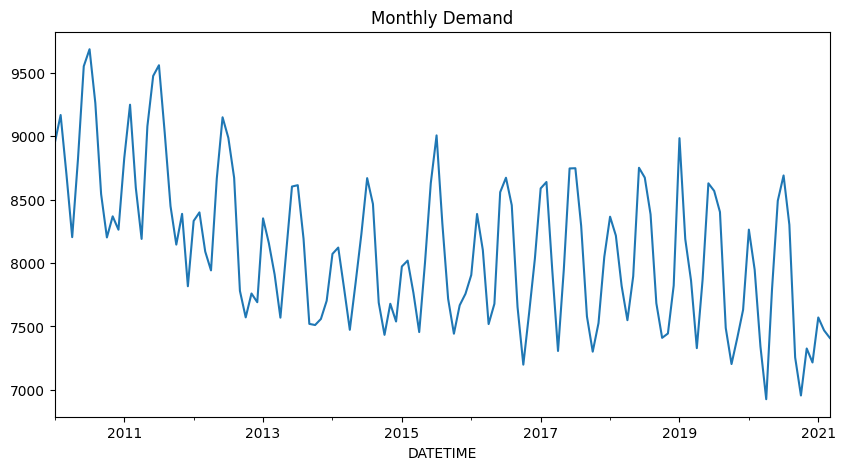

In [161]:
#monthly demand for each year
plt.figure(figsize=(10,5))
df.resample('M')['TOTALDEMAND'].mean().plot()
plt.title('Monthly Demand')
plt.show()


Now we explore yearly demand. 

In [179]:
#create a dataframe yearly demand
yearly_demand = df.copy()
#add year column
yearly_demand['YEAR'] = yearly_demand.index.year
#add month column
yearly_demand['MONTH'] = yearly_demand.index.month
#group by year
yearly_demand1 = yearly_demand.groupby(['YEAR', 'MONTH'])['TOTALDEMAND'].mean().unstack()

yearly_demand1.head()

MONTH,1,2,3,4,5,6,7,8,9,10,11,12
YEAR,,,,,,,,,,,,
2010,8948.055786,9166.352190,8701.475983,8203.730404,8819.433243,9550.843364,9684.923537,9260.392590,8543.102862,8201.262912,8367.778937,8262.366648
2011,8826.724832,9247.679070,8592.115064,8189.894924,9077.252267,9474.259325,9558.600121,9024.785202,8448.048597,8145.147672,8387.272886,7816.726156
2012,8331.493387,8398.848369,8090.202173,7941.618228,8666.215377,9148.677116,8986.175797,8671.620820,7780.241801,7571.352811,7759.588694,7690.875618
2013,8351.604577,8157.023237,7909.466734,7569.158382,8087.336916,8602.682953,8613.243481,8191.126382,7520.146750,7511.076351,7558.783472,7702.278555
2014,8071.566216,8121.609137,7803.086398,7473.460951,7843.409334,8228.064000,8668.729892,8465.086873,7687.309027,7433.596331,7678.673194,7538.827419


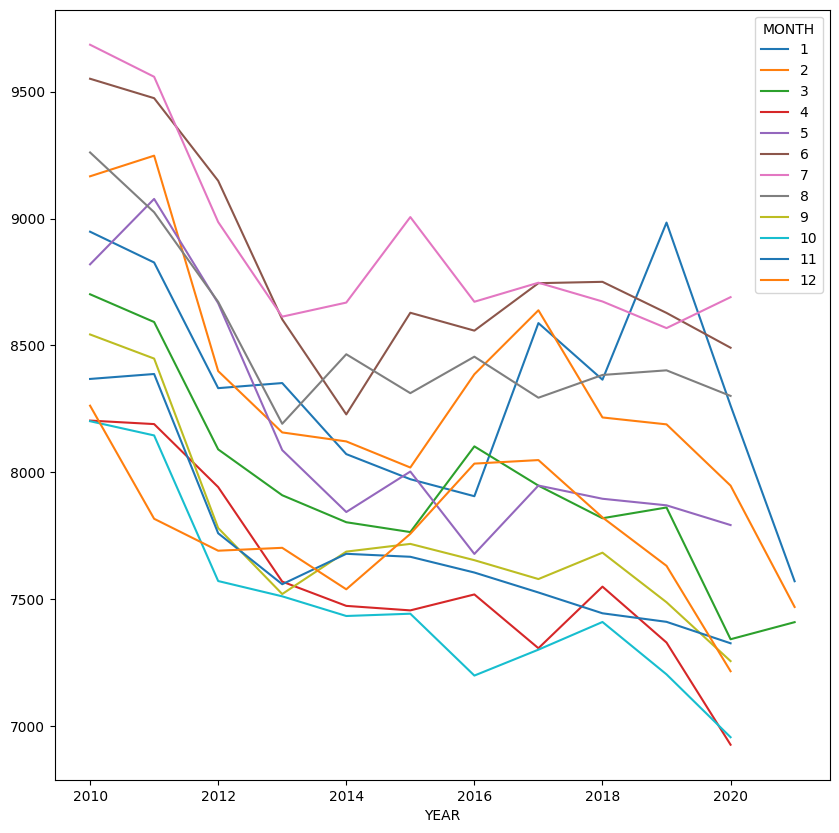

In [181]:
#plot yearly demand1 for each year in separate line plot
yearly_demand1.plot(figsize=(10,10))
plt.show()






### Final datset with holiday 

In [182]:
#read csv files into pandas dataframes
data = pd.read_csv('../data/final_data_nsw.csv') 
data.head()

,DATETIME,TOTALDEMAND,TEMPERATURE,DAYOFWEEK,SUMMER,AUTUMN,WINTER,SPRING,WEEKDAY,HOLIDAY
0,2014-01-01 00:00:00,7009.91,20.4,3,1,0,0,0,1,1
1,2014-01-01 00:30:00,6840.01,19.8,3,1,0,0,0,1,1
2,2014-01-01 01:00:00,6580.75,19.5,3,1,0,0,0,1,1
3,2014-01-01 01:30:00,6212.79,19.2,3,1,0,0,0,1,1
4,2014-01-01 02:00:00,5988.92,18.8,3,1,0,0,0,1,1


In [183]:
#change the dateformat of DATETIME
data['DATETIME'] = pd.to_datetime(data['DATETIME'])
data.head()

,DATETIME,TOTALDEMAND,TEMPERATURE,DAYOFWEEK,SUMMER,AUTUMN,WINTER,SPRING,WEEKDAY,HOLIDAY
0,2014-01-01 00:00:00,7009.91,20.4,3,1,0,0,0,1,1
1,2014-01-01 00:30:00,6840.01,19.8,3,1,0,0,0,1,1
2,2014-01-01 01:00:00,6580.75,19.5,3,1,0,0,0,1,1
3,2014-01-01 01:30:00,6212.79,19.2,3,1,0,0,0,1,1
4,2014-01-01 02:00:00,5988.92,18.8,3,1,0,0,0,1,1


In [184]:
data.dtypes


DATETIME       datetime64[ns]
TOTALDEMAND           float64
TEMPERATURE           float64
DAYOFWEEK               int64
SUMMER                  int64
AUTUMN                  int64
WINTER                  int64
SPRING                  int64
WEEKDAY                 int64
HOLIDAY                 int64
dtype: object

In [185]:
#use DATETIME as index
data.set_index('DATETIME', inplace=True)


In [201]:
#correlation between demand and all other columns
data.corr()['TOTALDEMAND'].sort_values(ascending=False)


TOTALDEMAND    1.000000
WINTER         0.285972
WEEKDAY        0.248369
TEMPERATURE    0.149364
SUMMER         0.048316
AUTUMN        -0.119705
HOLIDAY       -0.128516
DAYOFWEEK     -0.194017
SPRING        -0.214980
Name: TOTALDEMAND, dtype: float64

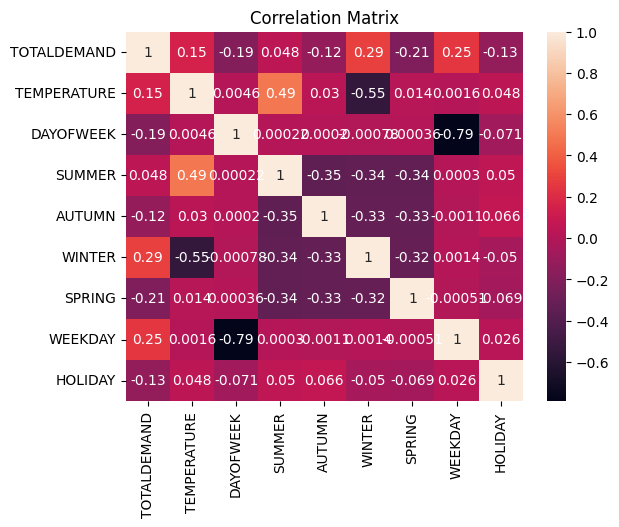

In [200]:
#plot correlation matrix
sns.heatmap(data.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()



<Axes: >

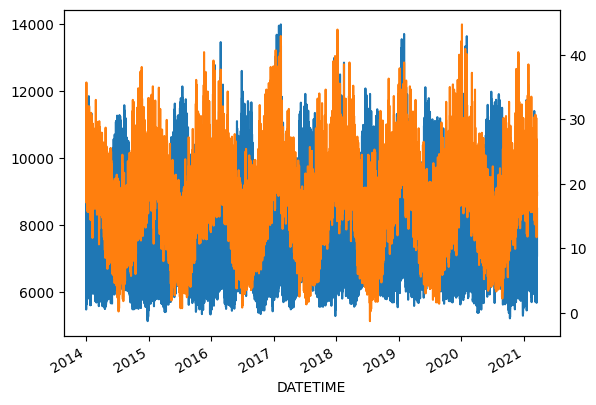

In [186]:
#plot demand and temperature in a line plot
data['TOTALDEMAND'].plot()
data['TEMPERATURE'].plot(secondary_y=True)



<Axes: xlabel='DATETIME'>

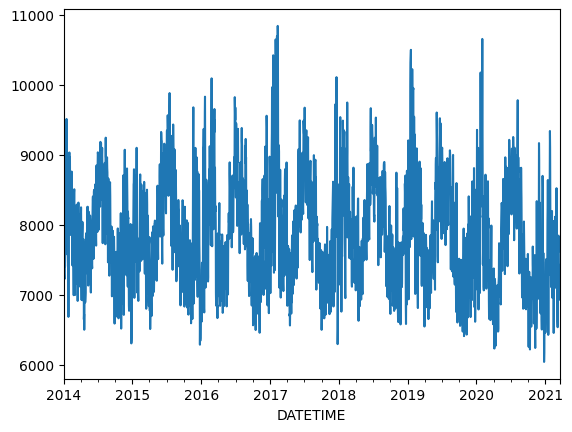

In [187]:
#plot daily demand 
data['TOTALDEMAND'].resample('D').mean().plot()



Above plot is for daily total demand over the time period 2014 - 2021.

/var/folders/vr/sx0pb6yj5415ch82cprw5jxc0000gn/T/ipykernel_97202/1175687861.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data['2018-06-01':'2018-06-30']['TOTALDEMAND'].resample('H').mean().plot()


<Axes: xlabel='DATETIME'>

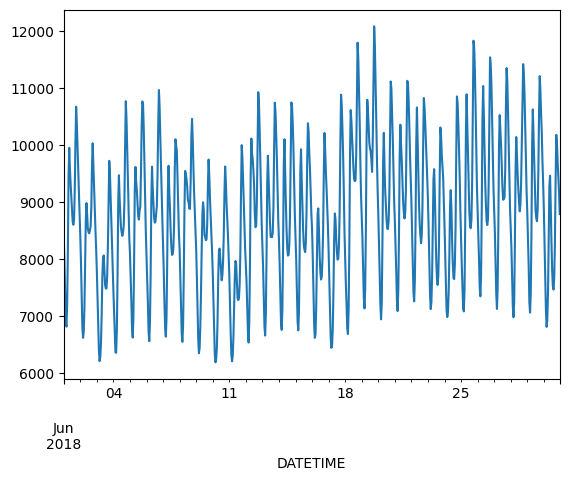

In [188]:
#hourly demand for a month
data['2018-06-01':'2018-06-30']['TOTALDEMAND'].resample('H').mean().plot()


<Axes: xlabel='WEEKDAY'>

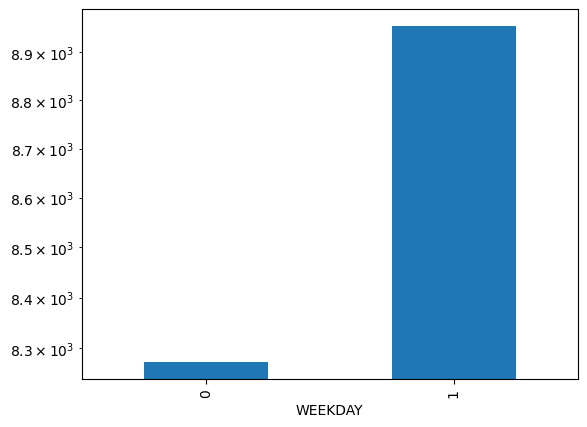

In [194]:
#weekday vs weekend demand for a month
data['2018-06-01':'2018-06-30'].groupby('WEEKDAY')['TOTALDEMAND'].mean().plot(kind='bar', logy=True)


<Axes: xlabel='DATETIME'>

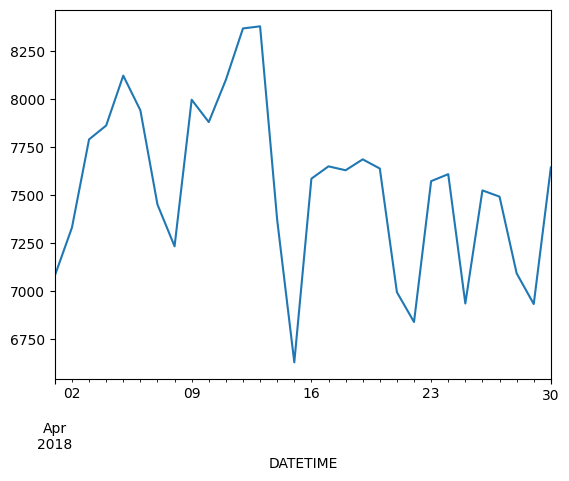

In [197]:
#show the data for april 2018 daily demand
data['2018-04-01':'2018-04-30']['TOTALDEMAND'].resample('D').mean().plot()


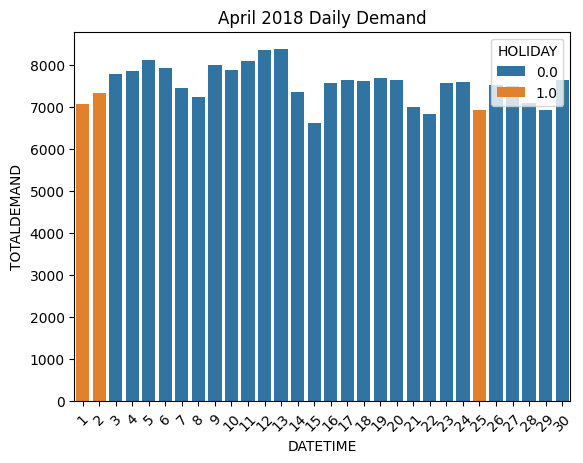

In [316]:

#April 2018 daily scaled demand
sns.barplot(data=data['2018-04-01':'2018-04-30'].resample('D').mean(), x=data['2018-04-01':'2018-04-30'].resample('D').mean().index.day, y='TOTALDEMAND', hue='HOLIDAY')
plt.title('April 2018 Daily Demand')
xticks = plt.xticks(rotation=45)
plt.show()




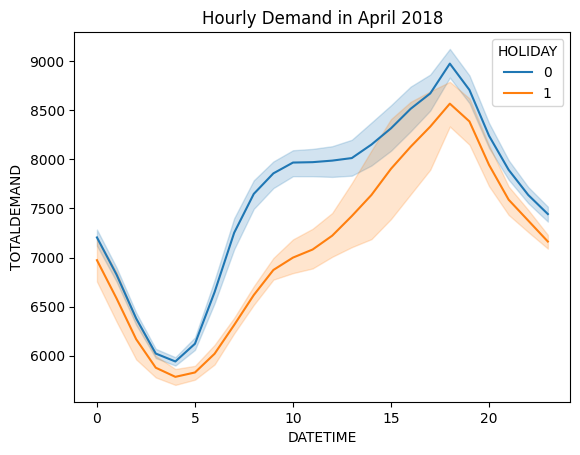

In [192]:
#plot hourly demand for appil 2018 use hue for holiday
sns.lineplot(data=data['2018-04-01':'2018-04-30'], x=data['2018-04-01':'2018-04-30'].index.hour, y='TOTALDEMAND', hue='HOLIDAY')
plt.title('Hourly Demand in April 2018')
plt.show()





/var/folders/vr/sx0pb6yj5415ch82cprw5jxc0000gn/T/ipykernel_97202/413355996.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=data.index.year, y='TOTALDEMAND', palette='coolwarm')


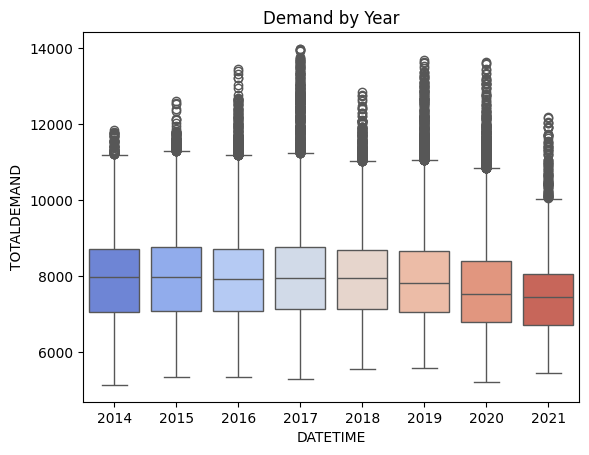

In [219]:
#box plot of demand by year
sns.boxplot(data=data, x=data.index.year, y='TOTALDEMAND', palette='coolwarm')
plt.title('Demand by Year')
plt.show()

In [221]:
#count number of rows from year 2014 to 2020
data['2014':'2020'].count()


TOTALDEMAND    122480
TEMPERATURE    122480
DAYOFWEEK      122480
SUMMER         122480
AUTUMN         122480
WINTER         122480
SPRING         122480
WEEKDAY        122480
HOLIDAY        122480
dtype: int64

In [232]:
#create a dataframe copying DATETIME column
data1 = data.copy()
#keep first 2 columns
data1 = data1.iloc[:, :1]
#create a new column DATE   
data1['DATE'] = data1.index.date

data1.head()






,TOTALDEMAND,DATE
DATETIME,,
2014-01-01 00:00:00,7009.91,2014-01-01
2014-01-01 00:30:00,6840.01,2014-01-01
2014-01-01 01:00:00,6580.75,2014-01-01
2014-01-01 01:30:00,6212.79,2014-01-01
2014-01-01 02:00:00,5988.92,2014-01-01


In [234]:
#count number of rows for each date
data1['DATE'].value_counts()


DATE
2014-01-01    48
2018-10-17    48
2018-10-19    48
2018-10-20    48
2018-10-21    48
              ..
2018-05-21    34
2016-07-15    34
2016-07-19    26
2016-03-11    25
2021-03-18     1
Name: count, Length: 2631, dtype: int64

In [235]:
#show count number <48 
data1['DATE'].value_counts()[data1['DATE'].value_counts() < 48]


DATE
2019-09-10    47
2016-08-24    47
2016-11-14    47
2014-08-07    47
2014-09-16    47
2015-11-18    47
2016-08-30    47
2017-04-20    47
2014-05-21    47
2020-09-22    46
2016-01-08    43
2018-03-23    43
2018-04-15    41
2016-03-10    37
2018-05-21    34
2016-07-15    34
2016-07-19    26
2016-03-11    25
2021-03-18     1
Name: count, dtype: int64

In [240]:
missing_data = data1['DATE'].value_counts()[data1['DATE'].value_counts() < 48]
missing_data

DATE
2019-09-10    47
2016-08-24    47
2016-11-14    47
2014-08-07    47
2014-09-16    47
2015-11-18    47
2016-08-30    47
2017-04-20    47
2014-05-21    47
2020-09-22    46
2016-01-08    43
2018-03-23    43
2018-04-15    41
2016-03-10    37
2018-05-21    34
2016-07-15    34
2016-07-19    26
2016-03-11    25
2021-03-18     1
Name: count, dtype: int64

In [237]:
missing_data.count()

19

In [244]:
#number of missing data 2014 - 2021
d = 48 - missing_data
d


DATE
2019-09-10     1
2016-08-24     1
2016-11-14     1
2014-08-07     1
2014-09-16     1
2015-11-18     1
2016-08-30     1
2017-04-20     1
2014-05-21     1
2020-09-22     2
2016-01-08     5
2018-03-23     5
2018-04-15     7
2016-03-10    11
2018-05-21    14
2016-07-15    14
2016-07-19    22
2016-03-11    23
2021-03-18    47
Name: count, dtype: int64

In [245]:
sum(d)

159

In [246]:
#except 2021
sum(d)-47


112

We observed in our final dataset, there are 112 missing rows (timestamp) ffrom Jan 2014 - Dec 2020. 

### Time series decomposition

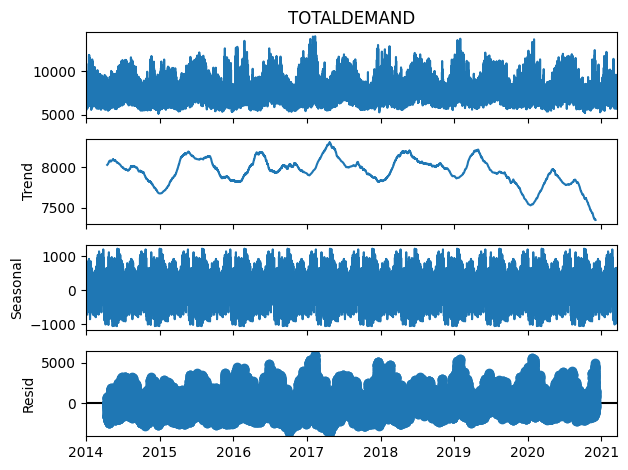

In [305]:
#timeseries decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data['TOTALDEMAND'], model='additive', period=48*7*30)
result.plot()
plt.show()

In [297]:
#copy DATETIME.index.year == 2019
data2019 = data.copy()
data2019 = data2019[data2019.index.year == 2019]
data2019.head()


,TOTALDEMAND,TEMPERATURE,DAYOFWEEK,SUMMER,AUTUMN,WINTER,SPRING,WEEKDAY,HOLIDAY
DATETIME,,,,,,,,,
2019-01-01 00:00:00,7612.74,22.3,2,1,0,0,0,1,1
2019-01-01 00:30:00,7457.58,22.3,2,1,0,0,0,1,1
2019-01-01 01:00:00,7243.21,23.0,2,1,0,0,0,1,1
2019-01-01 01:30:00,6918.55,23.2,2,1,0,0,0,1,1
2019-01-01 02:00:00,6676.58,23.8,2,1,0,0,0,1,1


In [298]:
data2019.dtypes

TOTALDEMAND    float64
TEMPERATURE    float64
DAYOFWEEK        int64
SUMMER           int64
AUTUMN           int64
WINTER           int64
SPRING           int64
WEEKDAY          int64
HOLIDAY          int64
dtype: object

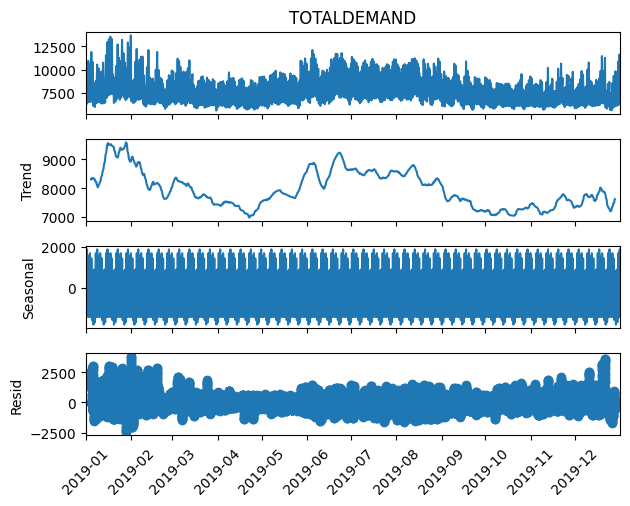

In [303]:
#seasonal decomposition for year 2019
result2019 = seasonal_decompose(data2019['TOTALDEMAND'], model='additive', period=48*7)
result2019.plot()
#plt.title('Seasonal Decomposition 2019')
plt.xticks(rotation=45)
plt.show()


The above plots refers to year 2019 demand. We see the trend has several peaks in summer and winter season. From the seasonal component, we can see the series actually has periodicities. 

### ADF Test

In [254]:
#stationarity test for the data
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [255]:
adf_test(data['TOTALDEMAND'])

Results of Dickey-Fuller Test:
Test Statistic                    -22.729334
p-value                             0.000000
#Lags Used                         72.000000
Number of Observations Used    126056.000000
Critical Value (1%)                -3.430402
Critical Value (5%)                -2.861563
Critical Value (10%)               -2.566782
dtype: float64


The null(H0) and alternate hypothesis(H1) of this test are:

H0: The series has a unit root (value of a=1),the series is non-stationary.

H1: The series has no unit root, the series is stationary.

If we cannot reject the null hypothesis, we can say that the series is not stationary, and if we do, it is stationary. If the series is not stationary it means it can be linear or constant different.

If test statistic < critical value

then we can reject the null hypothesis .

If test statistic > critical value

then we fail to reject the null hypothesis (which means the series is not stationary).



### Stationarity

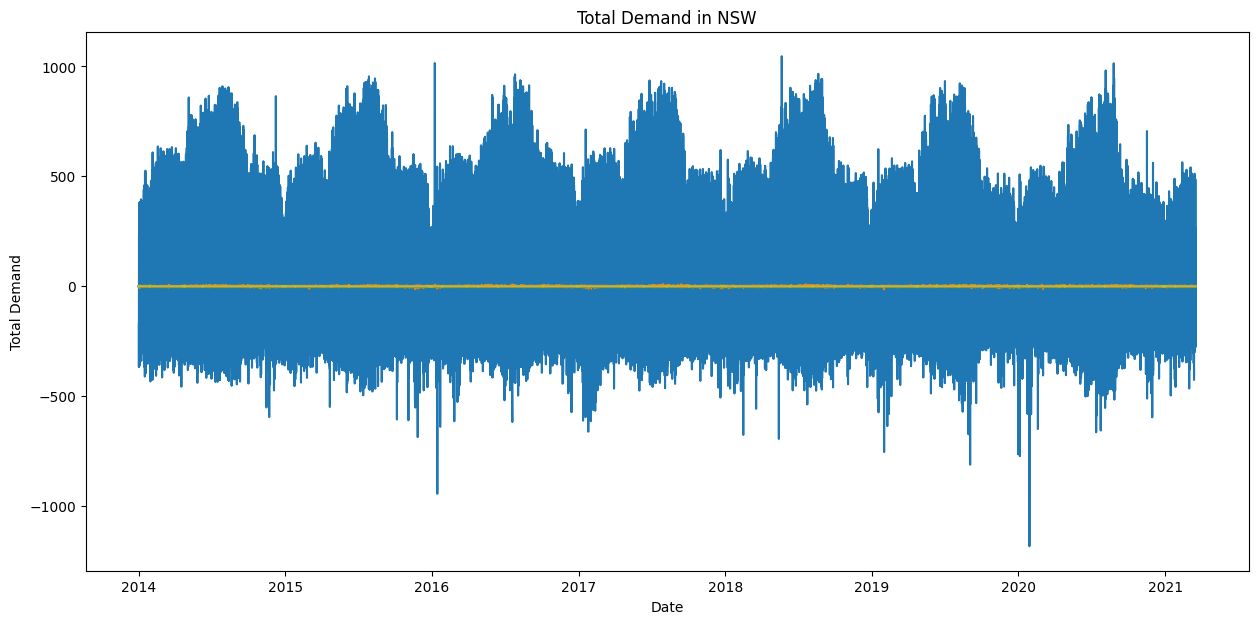

In [256]:
#plot stationary data
plt.figure(figsize=(15,7))
plt.plot(data.diff())
plt.title('Total Demand in NSW')
plt.ylabel('Total Demand')
plt.xlabel('Date')
plt.show()

### Lags

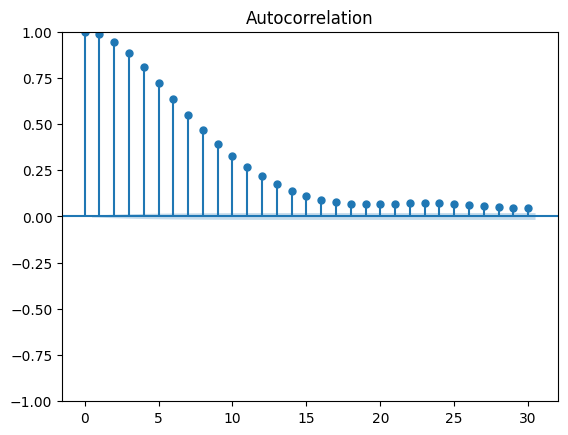

In [317]:
#plot autocorrelation and partial autocorrelation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data['TOTALDEMAND'], lags=30)
plt.show()




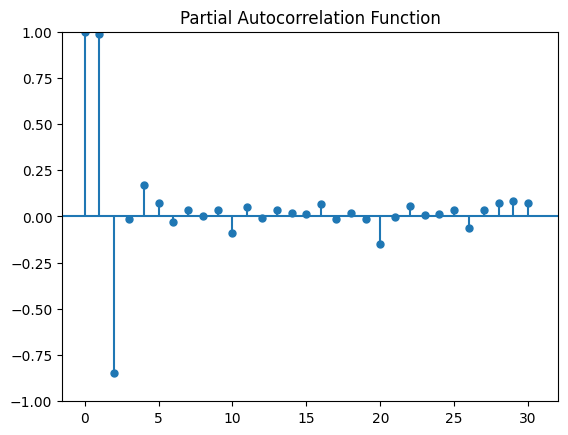

In [308]:
#PACF plot
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data['TOTALDEMAND'], lags=30, alpha=0.05)
plt.title('Partial Autocorrelation Function')
plt.show()
